In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['simhei']
%matplotlib inline

In [2]:
ex0 = pd.read_table('ex0.txt',header = None)

In [3]:
ex0.head()

,0,1,2
0,1.0,0.067732,3.176513
1,1.0,0.427810,3.816464
2,1.0,0.995731,4.550095
3,1.0,0.738336,4.256571
4,1.0,0.981083,4.560815


In [4]:
ex0.shape

(200, 3)

In [5]:
'''
函数功能：输入DF数据集（最后一列为标签），返回特征矩阵和标签矩阵
'''
def get_Mat(dataSet):
    xMat = np.mat(dataSet.iloc[:,: -1].values)
    yMat = np.mat(dataSet.iloc[:,-1].values).T
    return xMat,yMat

In [6]:
xMat,yMat = get_Mat(ex0)

In [7]:
'''
函数功能：数据集可视化
'''
def plotshow(dataSet):
    xMat,yMat = get_Mat(dataSet)
    plt.scatter(xMat.A[:,1],yMat.A,c='b',s=5)
    plt.show()

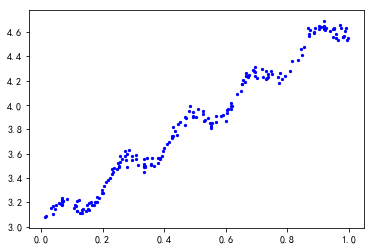

In [8]:
plotshow(ex0)

In [9]:
'''
函数功能：计算回归系数（根数上述推导出来的公式）
参数说明：
    dataSet：原始数据集
返回：
    ws：回归系数
'''

def standRegres(dataSet):
    xMat,yMat = get_Mat(dataSet)
    xTx = xMat.T * xMat
    #def(A)指的是矩阵A的行列式（determinant），如果det（A）=0，说明矩阵A是奇异矩阵，不可逆
    if np.linalg.det(xTx)==0:
        print('矩阵为奇异矩阵，无法求逆')
        return
    # xTx.I：求矩阵xTx的逆
    ws = xTx.I*(xMat.T*yMat)
    return ws

In [10]:
ws = standRegres(ex0)
ws

matrix([[3.00774324],
        [1.69532264]])

In [11]:
'''
函数功能：绘制散点图和最佳拟合直线
'''
def plotReg(dataSet):
    xMat,yMat = get_Mat(dataSet)
    plt.scatter(xMat.A[:,1],yMat.A,c='b',s=5)
    ws = standRegres(dataSet)
    yHat = xMat*ws
    plt.plot(xMat[:,1],yHat,c='r')
    plt.show()

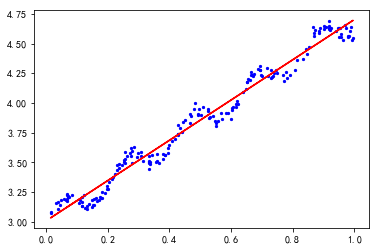

In [12]:
plotReg(ex0)

In [13]:
'''
计算相关系数

可以通过numpy中的np.corrcoef(yEstimat,yAcutual)来计算预测值和真实值之间的相关性

结果分析：
    该矩阵包含所有两两组合的相关系数，可以看到，对角线上全部为0，因为自身匹配肯定是最完美的，而yHat和yMat的相关系数为0.98。
'''
xMat,yMat = get_Mat(ex0)
ws = standRegres(ex0)
yHat = xMat*ws
np.corrcoef(yHat.T,yMat.T) # 保证两个都是行向量

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

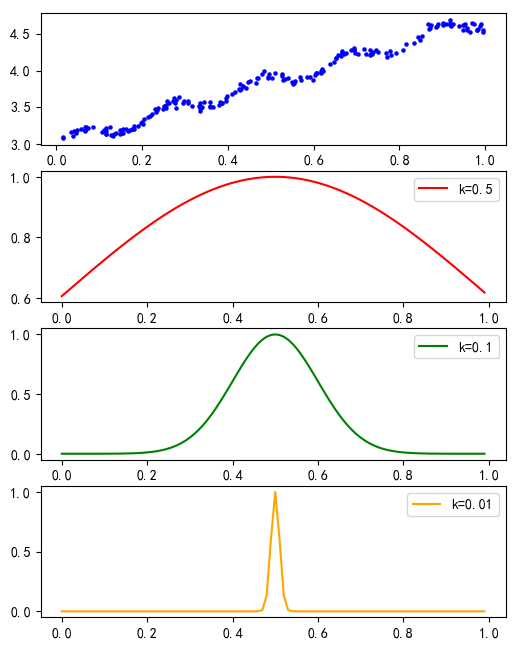

In [33]:
xMat,yMat = get_Mat(ex0)
x=0.5
xi = np.arange(0,1.0,0.01)
k1,k2,k3=0.5,0.1,0.01
w1 = np.exp((xi-x)**2/(-2*k1**2))
w2 = np.exp((xi-x)**2/(-2*k2**2))
w3 = np.exp((xi-x)**2/(-2*k3**2))
# 创建画布
fig = plt.figure(figsize=(6,8),dpi=100)
# 子画布1，原始数据集
fig1 = fig.add_subplot(411)
plt.scatter(xMat.A[:,1],yMat.A,c='b',s=5)
# 子画布2，k = 0.5
fig2 = fig.add_subplot(412)
plt.plot(xi,w1,color='r')
plt.legend(['k=0.5'])
# 子画布3，k = 0.1
fig3 = fig.add_subplot(413)
plt.plot(xi,w2,color='g')
plt.legend(['k=0.1'])
# 子画布4，k = 0.01
fig4 = fig.add_subplot(414)
plt.plot(xi,w3,color='orange')
plt.legend(['k=0.01'])
plt.show()

这里我们预测的点是x=0.5，最上面的图是原始数据集，从下面三张图可以看出随着k的减小，被用于训练模型的数据点越来越少。

In [28]:
'''
函数功能：计算局部加权线性回归的预测值
参数说明：
    testMat：测试集
    xMat：训练集的特征矩阵
    yMat：训练集的标签矩阵
返回：
    yHat：函数预测值
'''
def LWLR(testMat,xMat,yMat,k=1.0):
    n = testMat.shape[0]
    m = xMat.shape[0]
    # np.eye(m)，生成m行m列的对角矩阵，对角线为1
    weights = np.mat(np.eye(m))
    yHat = np.zeros(n)
    for i in range(n):
        for j in range(m):
            # 根据公式求出权重值
            diffMat = testMat[i] - xMat[j]
            weights[j,j] = np.exp(diffMat*diffMat.T/(-2*k**2))
        
        xTx = xMat.T*(weights*xMat)
        if np.linalg.det(xTx) == 0:
            print('矩阵为奇异矩阵，不能求逆')
            return
        ws = xTx.I*(xMat.T*(weights*yMat))# 加权后的回归系数
        yHat[i] = testMat[i]*ws
    return yHat

不同k值的结果图

我们调整k值，然后查看不同k值对模型的影响

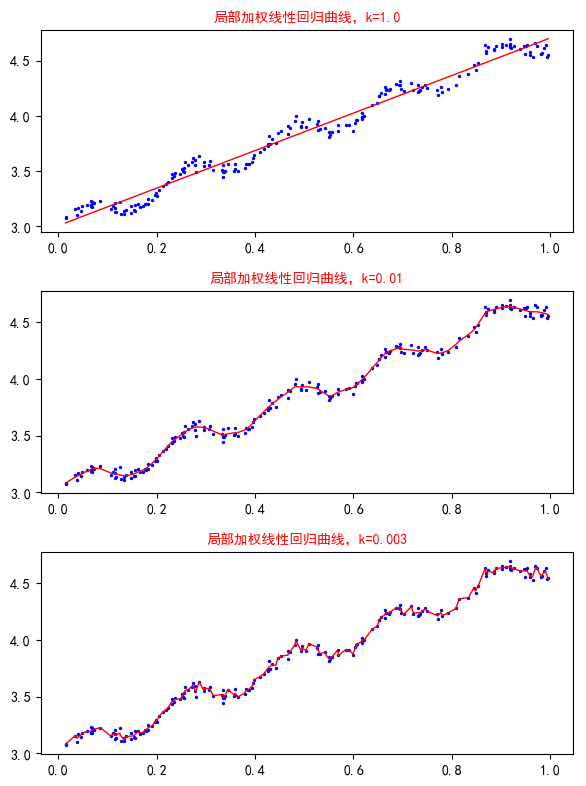

In [40]:
xMat,yMat = get_Mat(ex0)
# 将数据点排列（argsort()默认升序排列，返回索引）
srtInd = xMat[:,1].argsort(0)
xSort = xMat[srtInd][:,0]

# 计算不同k值下的y估计值yHat
yHat1 = LWLR(xMat,xMat,yMat,k=1.0)
yHat2 = LWLR(xMat,xMat,yMat,k=0.01)
yHat3 = LWLR(xMat,xMat,yMat,k=0.003)

# 创建画布
fig = plt.figure(figsize=(6,8),dpi=100)
# 字图1绘制k=1.0的曲线
fig1 = fig.add_subplot(311)
plt.scatter(xMat.A[:,1],yMat.A,c='b',s=2)
plt.plot(xSort[:,1],yHat1[srtInd],linewidth=1,color='r')
plt.title('局部加权线性回归曲线，k=1.0',size=10,color='r')


# 字图2绘制k=0.01的曲线
fig1 = fig.add_subplot(312)
plt.scatter(xMat[:,1].A,yMat.A,c='b',s=2)
plt.plot(xSort[:,1],yHat2[srtInd],linewidth=1,color='r')
plt.title('局部加权线性回归曲线，k=0.01',size=10,color='r')

# 字图3绘制k=0.003的曲线
fig1 = fig.add_subplot(313)
plt.scatter(xMat[:,1].A,yMat.A,c='b',s=2)
plt.plot(xSort[:,1],yHat3[srtInd],linewidth=1,color='r')
plt.title('局部加权线性回归曲线，k=0.003',size=10,color='r')

# 调整子图的间距
plt.tight_layout(pad=1.2)
plt.show()

上面三个图是不同平滑值绘出的局部加权线性回归结果。

当k=1.0时，模型的效果与最小二乘法差不多；
当k=0.01时，该模型基本上已经挖出了数据的潜在规律；
当继续减小到k=0.003时，会发现模型考虑了太多的噪音，进而导致了过拟合的现象。

In [41]:
xMat,yMat = get_Mat(ex0)
# 将数据点排列（argsort()默认升序排列，返回索引）
srtInd = xMat[:,1].argsort(0)
xSort = xMat[srtInd][:,0]


In [42]:
xSort

matrix([[1.      , 0.014855],
        [1.      , 0.015371],
        [1.      , 0.033859],
        [1.      , 0.038326],
        [1.      , 0.040486],
        [1.      , 0.045353],
        [1.      , 0.047744],
        [1.      , 0.058014],
        [1.      , 0.066379],
        [1.      , 0.067119],
        [1.      , 0.067154],
        [1.      , 0.067732],
        [1.      , 0.068854],
        [1.      , 0.070095],
        [1.      , 0.070237],
        [1.      , 0.073224],
        [1.      , 0.085031],
        [1.      , 0.106352],
        [1.      , 0.110521],
        [1.      , 0.115487],
        [1.      , 0.116089],
        [1.      , 0.116163],
        [1.      , 0.116598],
        [1.      , 0.124931],
        [1.      , 0.126762],
        [1.      , 0.132791],
        [1.      , 0.133295],
        [1.      , 0.138306],
        [1.      , 0.147846],
        [1.      , 0.148364],
        [1.      , 0.15335 ],
        [1.      , 0.156383],
        [1.      , 0.156433],
        [1

In [44]:
# 四种模型相关系数的比较

np.corrcoef(yHat.T,yMat.T) # 最小二乘法
np.corrcoef(yHat1.T,yMat.T) # k=1.0模型
np.corrcoef(yHat2.T,yMat.T) # k=0.01模型
np.corrcoef(yHat3.T,yMat.T) # k=0.003模型

array([[1.        , 0.99931945],
       [0.99931945, 1.        ]])

In [85]:
abalone = pd.read_table('abalone.txt',header = None)
abalone.columns=['性别','长度','直径','高度','整体重量','肉重量','内脏重量','壳重','年龄']

In [93]:
k = abalone[100:199].copy()

In [94]:
k

,性别,长度,直径,高度,整体重量,肉重量,内脏重量,壳重,年龄
100,0,0.360,0.265,0.095,0.2315,0.1050,0.0460,0.075,7
101,1,0.550,0.435,0.145,0.8430,0.3280,0.1915,0.255,15
102,1,0.530,0.435,0.160,0.8830,0.3160,0.1640,0.335,15
103,1,0.530,0.415,0.140,0.7240,0.3105,0.1675,0.205,10
104,1,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.345,12
105,-1,0.520,0.410,0.155,0.7270,0.2910,0.1835,0.235,12
106,-1,0.545,0.430,0.165,0.8020,0.2935,0.1830,0.280,11
107,-1,0.500,0.400,0.125,0.6675,0.2610,0.1315,0.220,10
108,-1,0.510,0.390,0.135,0.6335,0.2310,0.1790,0.200,9
109,-1,0.435,0.395,0.105,0.3635,0.1360,0.0980,0.130,9


In [49]:
abalone.shape

(4177, 9)

In [50]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
性别      4177 non-null int64
长度      4177 non-null float64
直径      4177 non-null float64
高度      4177 non-null float64
整体重量    4177 non-null float64
肉重量     4177 non-null float64
内脏重量    4177 non-null float64
壳重      4177 non-null float64
年龄      4177 non-null int64
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [63]:
'''
函数功能：切分训练集和测试集
参数说明：
    dataSet：原始数据集
    rate：训练集比例
返回：
    train，test：切分好的训练集和测试集
'''
def randSplit(dataSet,rate):
    m = dataSet.shape[0]
    n = int(m*rate)
    train = dataSet.iloc[:n,:]
    test = dataSet.iloc[n:m,:]
    test.index = range(test.shape[0])# 更改测试集的索引
    return train,test

In [64]:
train,test = randSplit(abalone,0.8)

In [65]:
train.head()

,性别,长度,直径,高度,整体重量,肉重量,内脏重量,壳重,年龄
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [66]:
train.shape

(3341, 9)

In [67]:
test.head()

,性别,长度,直径,高度,整体重量,肉重量,内脏重量,壳重,年龄
0,-1,0.490,0.390,0.135,0.590,0.2150,0.125,0.1845,12
1,1,0.430,0.330,0.095,0.340,0.1315,0.085,0.1120,14
2,-1,0.455,0.365,0.110,0.385,0.1660,0.046,0.1345,13
3,0,0.495,0.380,0.145,0.515,0.1750,0.098,0.2120,13
4,-1,0.480,0.380,0.145,0.590,0.2320,0.141,0.2300,12


In [68]:
test.shape

(836, 9)

In [70]:
'''
函数功能：计算误差平方和SSE
参数说明：
    yMat:真实值
    yHat：估计值
返回：
    SSE：误差平方和
'''
def sseCal(yMat,yHat):
    sse = ((yMat.A.flatten()-yHat)**2).sum()
    return sse

## 构建加权线性模型
因为数据量太大，计算速度极慢，所以此处选择前100个数据作为训练集，第100-200个数据作为测试集

In [76]:
'''
函数功能：绘制不同k取值下，训练集和测试集的SSE
'''
def showPlot(abalone):
    abX,abY = get_Mat(abalone)
    train_sse = []
    test_sse = []
    for k in np.arange(0.5,10.1,0.1):
        yHat1 = LWLR(abX[:99],abX[:99],abY[:99],k)
        sse1 = sseCal(abY[:99],yHat1)
        train_sse.append(sse1)
        
        yHat2 = LWLR(abX[100:199],abX[:99],abY[:99],k)
        sse2 = sseCal(abY[100:199],yHat2)
        test_sse.append(sse2)
        
    plt.plot(np.arange(0.5,10.1,0.1),train_sse,color='b')
    plt.plot(np.arange(0.5,10.1,0.1),test_sse,color='r') 
    
    plt.xlabel('不同k取值')
    plt.ylabel('SSE')
    
    plt.legend(['train_sse','test_sse'])

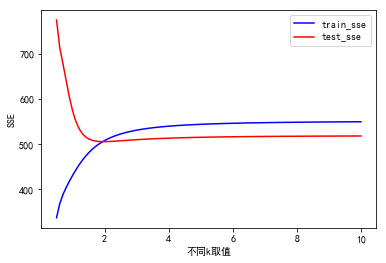

In [78]:
showPlot(abalone)

In [79]:
abX,abY = get_Mat(abalone)
yHat2 = LWLR(abX[100:199],abX[:99],abY[:99],k=2)

In [97]:
k['预测年龄']= yHat2

In [99]:
k.index = range(k.shape[0])

In [100]:
k

,性别,长度,直径,高度,整体重量,肉重量,内脏重量,壳重,年龄,预测年龄
0,0,0.360,0.265,0.095,0.2315,0.1050,0.0460,0.075,7,7.129678
1,1,0.550,0.435,0.145,0.8430,0.3280,0.1915,0.255,15,11.126599
2,1,0.530,0.435,0.160,0.8830,0.3160,0.1640,0.335,15,12.053369
3,1,0.530,0.415,0.140,0.7240,0.3105,0.1675,0.205,10,10.455921
4,1,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.345,12,12.987892
5,-1,0.520,0.410,0.155,0.7270,0.2910,0.1835,0.235,12,11.085225
6,-1,0.545,0.430,0.165,0.8020,0.2935,0.1830,0.280,11,12.111464
7,-1,0.500,0.400,0.125,0.6675,0.2610,0.1315,0.220,10,10.918726
8,-1,0.510,0.390,0.135,0.6335,0.2310,0.1790,0.200,9,9.746800
9,-1,0.435,0.395,0.105,0.3635,0.1360,0.0980,0.130,9,8.285171
